In [10]:
import yfinance as yf
import pandas as pd

# 1. Ticker del S&P 500 (^GSPC)
# Nota: La práctica solicita 'S&P500', cuyo ticker es ^GSPC.
ticker_simbolo = "^GSPC"

# 2. Definir el período de tiempo solicitado
# La práctica pide: desde el primer día después del 1/ene/2023
# hasta el 1/sep/2025 o el último día disponible antes.
fecha_inicio = "2023-01-02"  # Se usa el 2 de enero para asegurar que es 'posterior al 1 de enero'
fecha_fin = "2025-09-02"     # Se usa un día después del 1 de septiembre para incluir ese día

# 3. Descargar los datos de cotización
datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)

# 4. Mostrar las primeras filas y verificar el tipo de dato
print("Primeras filas de los datos descargados:")
print(datos.head())
print("\nÚltimas filas de los datos descargados (para verificar la fecha final):")
print(datos.tail())

C:\Users\mitri\AppData\Local\Temp\ipykernel_15768\766928915.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)
[*********************100%***********************]  1 of 1 completed

Primeras filas de los datos descargados:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2023-01-03  3824.139893  3878.459961  3794.330078  3853.290039  3959140000
2023-01-04  3852.969971  3873.159912  3815.770020  3840.360107  4414080000
2023-01-05  3808.100098  3839.739990  3802.419922  3839.739990  3893450000
2023-01-06  3895.080078  3906.189941  3809.560059  3823.370117  3923560000
2023-01-09  3892.090088  3950.570068  3890.419922  3910.820068  4311770000

Últimas filas de los datos descargados (para verificar la fecha final):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-08-25  6439.319824  6466.890137  6438.060059  6457.66992

In [11]:
# Extraer solo los datos de cierre
precios_cierre = datos['Close']

# Calcular las rentabilidades según la fórmula: r_t = (P_t - P_{t-1}) / P_{t-1}
rentabilidades = (precios_cierre.diff() / precios_cierre.shift(1)).dropna()

# Mostrar resultados
print("Precios de cierre:")
print(precios_cierre.head(10))
print("\nRentabilidades calculadas (primeros valores):")
print(rentabilidades.head(10))

Precios de cierre:
Ticker            ^GSPC
Date                   
2023-01-03  3824.139893
2023-01-04  3852.969971
2023-01-05  3808.100098
2023-01-06  3895.080078
2023-01-09  3892.090088
2023-01-10  3919.250000
2023-01-11  3969.610107
2023-01-12  3983.169922
2023-01-13  3999.090088
2023-01-17  3990.969971

Rentabilidades calculadas (primeros valores):
Ticker         ^GSPC
Date                
2023-01-04  0.007539
2023-01-05 -0.011646
2023-01-06  0.022841
2023-01-09 -0.000768
2023-01-10  0.006978
2023-01-11  0.012849
2023-01-12  0.003416
2023-01-13  0.003997
2023-01-17 -0.002030
2023-01-18 -0.015563


ESTADÍSTICAS DESCRIPTIVAS DE LAS RENTABILIDADES
Período: 2023-01-04 al 2025-08-29
Media:     0.000835
Varianza:  0.000095
Sesgo:     0.627499
Kurtosis:  15.955405


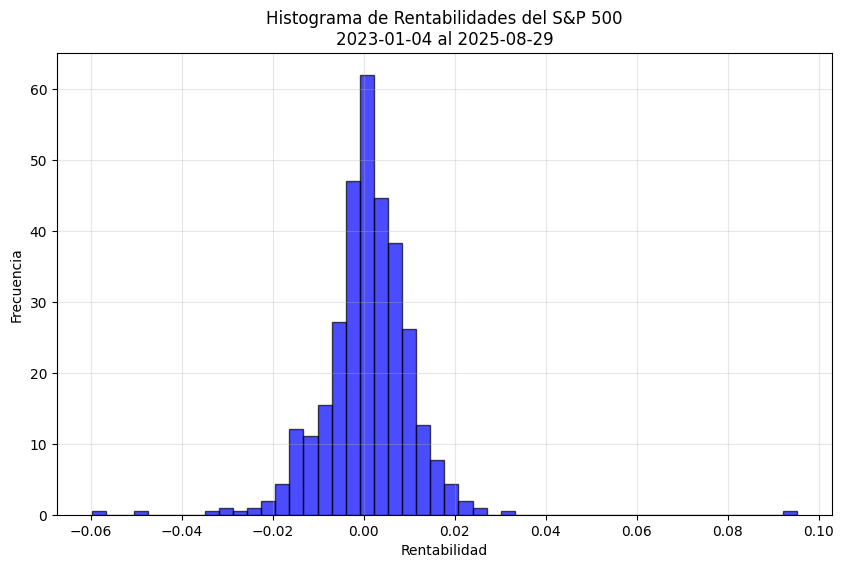

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

# Calcular estadísticas descriptivas
media = rentabilidades.mean().item()
varianza = rentabilidades.var().item()
sesgo = rentabilidades.skew().item()
kurtosis = rentabilidades.kurtosis().item()

# Crear tabla de resultados
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS DE LAS RENTABILIDADES")
print(f"Período: {rentabilidades.index[0].date()} al {rentabilidades.index[-1].date()}")
print("=" * 60)
print(f"Media:     {media:.6f}")
print(f"Varianza:  {varianza:.6f}")
print(f"Sesgo:     {sesgo:.6f}")
print(f"Kurtosis:  {kurtosis:.6f}")
print("=" * 60)

# Dibujar histograma
plt.figure(figsize=(10, 6))
plt.hist(rentabilidades, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Rentabilidad')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de Rentabilidades del S&P 500\n{rentabilidades.index[0].date()} al {rentabilidades.index[-1].date()}')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Construir matriz de variables dependientes e independientes
# Variable dependiente: rt (rentabilidad del día actual)
# Variables independientes: rt-1, rt-2, rt-3, rt-4, rt-5 (rentabilidades de los 5 días anteriores)

# Crear un DataFrame con las variables independientes (lag de 1 a 5 días)
matriz_datos = pd.DataFrame()
matriz_datos['r_t'] = rentabilidades  # Variable dependiente

# Crear las variables independientes (5 días anteriores)
for i in range(1, 6):
    matriz_datos[f'r_t-{i}'] = rentabilidades.shift(i)

# Eliminar filas con valores NaN (las primeras 5 filas no tendrán datos completos)
# Esto descarta las observaciones incompletas, empezando desde la SEXTA observación
matriz_datos = matriz_datos.dropna()

# Mostrar información sobre la matriz construida
print("=" * 70)
print("MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES")
print("=" * 70)
print(f"Dimensiones de la matriz: {matriz_datos.shape[0]} filas x {matriz_datos.shape[1]} columnas")
print(f"Primera observación completa: {matriz_datos.index[0].date()}")
print(f"Última observación: {matriz_datos.index[-1].date()}")
print("=" * 70)
print("\nPrimeras 10 filas de la matriz:")
print(matriz_datos.head(10))
print("\nÚltimas 5 filas de la matriz:")
print(matriz_datos.tail(5))
print("\nResumen estadístico:")
print(matriz_datos.describe())

MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES
Dimensiones de la matriz: 661 filas x 6 columnas
Primera observación completa: 2023-01-11
Última observación: 2025-08-29

Primeras 10 filas de la matriz:
                 r_t     r_t-1     r_t-2     r_t-3     r_t-4     r_t-5
Date                                                                  
2023-01-11  0.012849  0.006978 -0.000768  0.022841 -0.011646  0.007539
2023-01-12  0.003416  0.012849  0.006978 -0.000768  0.022841 -0.011646
2023-01-13  0.003997  0.003416  0.012849  0.006978 -0.000768  0.022841
2023-01-17 -0.002030  0.003997  0.003416  0.012849  0.006978 -0.000768
2023-01-18 -0.015563 -0.002030  0.003997  0.003416  0.012849  0.006978
2023-01-19 -0.007638 -0.015563 -0.002030  0.003997  0.003416  0.012849
2023-01-20  0.018918 -0.007638 -0.015563 -0.002030  0.003997  0.003416
2023-01-23  0.011881  0.018918 -0.007638 -0.015563 -0.002030  0.003997
2023-01-24 -0.000712  0.011881  0.018918 -0.007638 -0.015563 -0.002030
2023-01-25 -0.0

### Análisis de Regresión Lineal sobre Rentabilidades del S&P 500

#### Descripción de la Matriz de Datos

La matriz construida contiene **661 observaciones** con **6 variables**:

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `r_t` | **Dependiente** | Rentabilidad del día actual (variable a predecir) |
| `r_t-1` | Independiente | Rentabilidad del día anterior (lag 1) |
| `r_t-2` | Independiente | Rentabilidad de hace 2 días (lag 2) |
| `r_t-3` | Independiente | Rentabilidad de hace 3 días (lag 3) |
| `r_t-4` | Independiente | Rentabilidad de hace 4 días (lag 4) |
| `r_t-5` | Independiente | Rentabilidad de hace 5 días (lag 5) |

#### Modelo de Regresión Lineal

El modelo de regresión lineal múltiple que queremos ajustar es:

$$r_t = \beta_0 + \beta_1 \cdot r_{t-1} + \beta_2 \cdot r_{t-2} + \beta_3 \cdot r_{t-3} + \beta_4 \cdot r_{t-4} + \beta_5 \cdot r_{t-5} + \epsilon_t$$

Donde:
- $r_t$ = Rentabilidad del día actual (variable dependiente)
- $\beta_0$ = Término independiente (intercepto)
- $\beta_1, \beta_2, \beta_3, \beta_4, \beta_5$ = Coeficientes de regresión que miden el impacto de cada rentabilidad pasada
- $r_{t-1}, r_{t-2}, r_{t-3}, r_{t-4}, r_{t-5}$ = Rentabilidades de los 5 días anteriores (variables independientes)
- $\epsilon_t$ = Error o residuo del modelo

#### Interpretación de los Coeficientes

- Si $\beta_i > 0$: Una rentabilidad positiva en el día $t-i$ sugiere una rentabilidad positiva en el día $t$ (efecto momentum)
- Si $\beta_i < 0$: Una rentabilidad positiva en el día $t-i$ sugiere una rentabilidad negativa en el día $t$ (efecto reversión)
- Si $\beta_i \approx 0$: No hay relación significativa entre esa rentabilidad pasada y la actual

#### Notas Importantes

- Las **primeras 5 observaciones** de rentabilidades fueron descartadas porque no tienen los 5 lags completos
- La matriz comienza el **11 de enero de 2023** (sexta observación de rentabilidades)
- Este modelo asume una **relación lineal** entre las variables

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Paso 1: Separar las variables independientes (X) y la variable dependiente (y)
X = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']]  # Variables independientes
y = matriz_datos['r_t']  # Variable dependiente

# Paso 2: Crear y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X, y)  # Ajustar el modelo con todos los datos (dentro de la muestra)

# Paso 3: Hacer predicciones sobre los mismos datos (calibración dentro de la muestra)
y_predicho = modelo.predict(X)

# Paso 4: Crear un DataFrame con los rendimientos reales vs predichos
comparacion = pd.DataFrame({
    'Rendimiento_Real': y.values,
    'Rendimiento_Predicho': y_predicho
}, index=y.index)

# Paso 5: Calcular las métricas de error
mse = mean_squared_error(y, y_predicho)
mae = mean_absolute_error(y, y_predicho)
mape = mean_absolute_percentage_error(y, y_predicho)

# Paso 6: Mostrar los resultados del modelo
print("=" * 70)
print("MODELO DE REGRESIÓN LINEAL MÚLTIPLE - RESULTADOS")
print("=" * 70)
print(f"\nModelo ajustado: r_t = β₀ + β₁·r_t-1 + β₂·r_t-2 + β₃·r_t-3 + β₄·r_t-4 + β₅·r_t-5")
print(f"\nCoeficientes del modelo:")
print(f"  β₀ (Intercepto): {modelo.intercept_:.8f}")
for i, coef in enumerate(modelo.coef_, 1):
    print(f"  β{i} (r_t-{i}):      {coef:.8f}")

print("\n" + "=" * 70)
print("MÉTRICAS DE CALIDAD DEL MODELO (Dentro de la muestra)")
print("=" * 70)
print(f"MSE  (Error Cuadrático Medio):           {mse:.10f}")
print(f"MAE  (Error Absoluto Medio):             {mae:.10f}")
print(f"MAPE (Error Porcentual Absoluto Medio):  {mape:.6f} ({mape*100:.2f}%)")
print("=" * 70)

print("\nComparación Rendimientos Reales vs Predichos (primeras 10 observaciones):")
print(comparacion.head(10))
print("\nComparación Rendimientos Reales vs Predichos (últimas 10 observaciones):")
print(comparacion.tail(10))

# Estadísticas descriptivas de la comparación
print("\n" + "=" * 70)
print("ESTADÍSTICAS DESCRIPTIVAS DE LAS PREDICCIONES")
print("=" * 70)
print(comparacion.describe())

MODELO DE REGRESIÓN LINEAL MÚLTIPLE - RESULTADOS

Modelo ajustado: r_t = β₀ + β₁·r_t-1 + β₂·r_t-2 + β₃·r_t-3 + β₄·r_t-4 + β₅·r_t-5

Coeficientes del modelo:
  β₀ (Intercepto): 0.00097349
  β1 (r_t-1):      -0.04109767
  β2 (r_t-2):      0.03922395
  β3 (r_t-3):      -0.10507638
  β4 (r_t-4):      -0.06972391
  β5 (r_t-5):      -0.02562891

MÉTRICAS DE CALIDAD DEL MODELO (Dentro de la muestra)
MSE  (Error Cuadrático Medio):           0.0000926694
MAE  (Error Absoluto Medio):             0.0067245225
MAPE (Error Porcentual Absoluto Medio):  2.815340 (281.53%)

Comparación Rendimientos Reales vs Predichos (primeras 10 observaciones):
            Rendimiento_Real  Rendimiento_Predicho
Date                                              
2023-01-11          0.012849             -0.001125
2023-01-12          0.003416             -0.000494
2023-01-13          0.003997              0.000072
2023-01-17         -0.002030             -0.000874
2023-01-18         -0.015563             -0.000220
2023

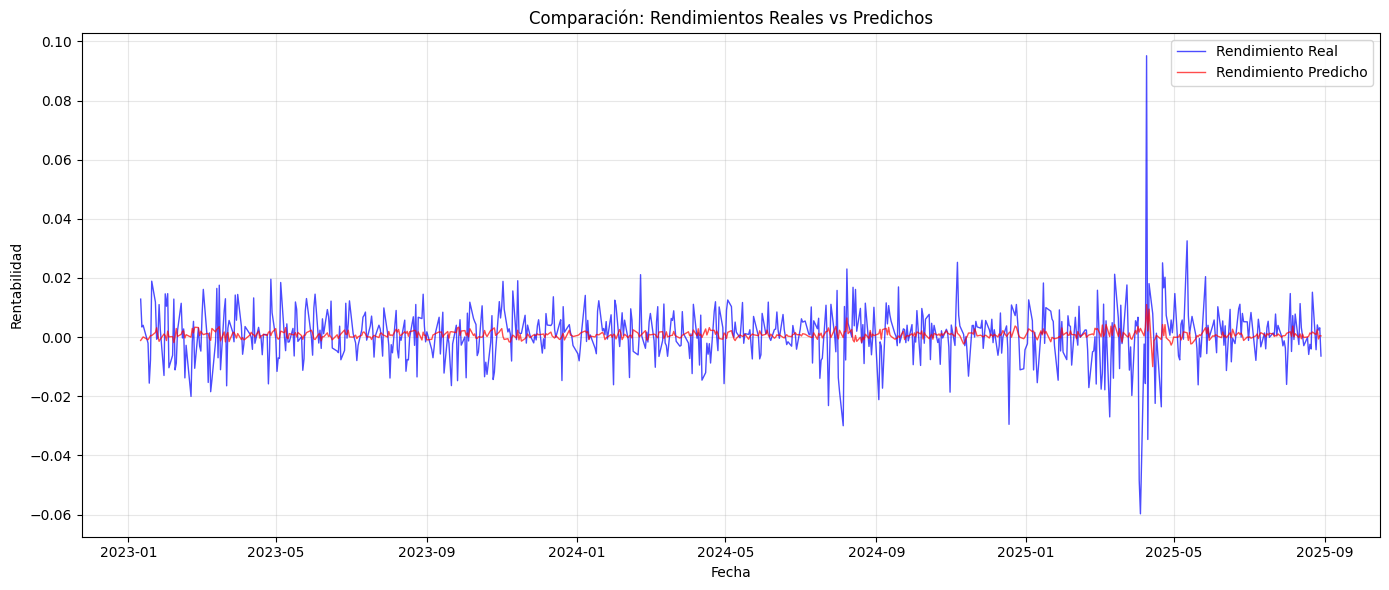

In [18]:
# Visualización: Gráfica de Rendimientos Reales vs Predichos
plt.figure(figsize=(14, 6))
plt.plot(comparacion.index, comparacion['Rendimiento_Real'], 
         label='Rendimiento Real', color='blue', linewidth=1, alpha=0.7)
plt.plot(comparacion.index, comparacion['Rendimiento_Predicho'], 
         label='Rendimiento Predicho', color='red', linewidth=1, alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad')
plt.title('Comparación: Rendimientos Reales vs Predichos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretación de Resultados

### Métricas de Calidad del Modelo (Dentro de la Muestra)

Las tres métricas calculadas evalúan la **calidad del calibrado** del modelo:

| Métrica | Significado |
|---------|-------------|
| **MSE** (Error Cuadrático Medio) | Penaliza más los errores grandes. Cuanto menor, mejor. |
| **MAE** (Error Absoluto Medio) | Error promedio en las mismas unidades que la variable. |
| **MAPE** (Error Porcentual Absoluto Medio) | Error en porcentaje. |

### Gráfica de Rendimientos Reales vs Predichos

- La línea **azul** representa los rendimientos reales del S&P 500
- La línea **roja** representa los rendimientos predichos por el modelo de regresión lineal
- Se observa que el modelo suaviza las predicciones y tiene dificultad para capturar movimientos extremos

COMPARACIÓN: REGRESIÓN LINEAL vs PASEO ALEATORIO

Métricas de ambos modelos:
                   Modelo      MSE      MAE    MAPE
Regresión Lineal Múltiple 0.000093 0.006725 2.81534
   Paseo Aleatorio (rt=0) 0.000095 0.006702 1.00000

MEJORA DEL MODELO DE REGRESIÓN SOBRE EL PASEO ALEATORIO
Mejora en MSE:  +2.6110% ✓ MEJOR
Mejora en MAE:  -0.3350% ✗ PEOR
Mejora en MAPE: -181.5340% ✗ PEOR


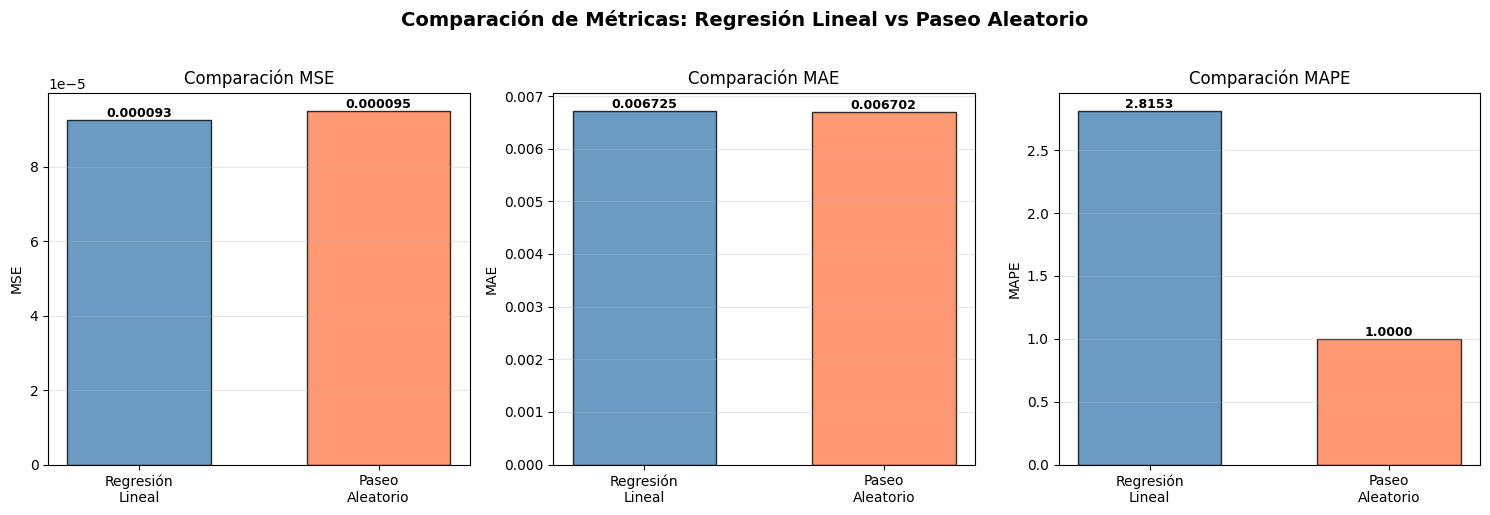

In [21]:
# Comparación con un modelo de Paseo Aleatorio (Random Walk)
# En un paseo aleatorio, la mejor predicción es que rt = 0 (no hay cambio esperado)

import numpy as np

# Crear predicciones del modelo de paseo aleatorio
y_paseo_aleatorio = np.zeros(len(y))  # Todas las predicciones son 0

# Calcular las métricas para el paseo aleatorio
mse_paseo = mean_squared_error(y, y_paseo_aleatorio)
mae_paseo = mean_absolute_error(y, y_paseo_aleatorio)
mape_paseo = mean_absolute_percentage_error(y, y_paseo_aleatorio)

# Crear un DataFrame comparativo
comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresión Lineal Múltiple', 'Paseo Aleatorio (rt=0)'],
    'MSE': [mse, mse_paseo],
    'MAE': [mae, mae_paseo],
    'MAPE': [mape, mape_paseo]
})

# Calcular la mejora porcentual del modelo de regresión sobre el paseo aleatorio
mejora_mse = ((mse_paseo - mse) / mse_paseo) * 100
mejora_mae = ((mae_paseo - mae) / mae_paseo) * 100
mejora_mape = ((mape_paseo - mape) / mape_paseo) * 100

# Mostrar resultados
print("=" * 80)
print("COMPARACIÓN: REGRESIÓN LINEAL vs PASEO ALEATORIO")
print("=" * 80)
print("\nMétricas de ambos modelos:")
print(comparacion_modelos.to_string(index=False))

print("\n" + "=" * 80)
print("MEJORA DEL MODELO DE REGRESIÓN SOBRE EL PASEO ALEATORIO")
print("=" * 80)
print(f"Mejora en MSE:  {mejora_mse:+.4f}% {'✓ MEJOR' if mejora_mse > 0 else '✗ PEOR'}")
print(f"Mejora en MAE:  {mejora_mae:+.4f}% {'✓ MEJOR' if mejora_mae > 0 else '✗ PEOR'}")
print(f"Mejora en MAPE: {mejora_mape:+.4f}% {'✓ MEJOR' if mejora_mape > 0 else '✗ PEOR'}")
print("=" * 80)

# Gráfico comparativo simple
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metricas = ['MSE', 'MAE', 'MAPE']
valores_regresion = [mse, mae, mape]
valores_paseo = [mse_paseo, mae_paseo, mape_paseo]

for i, (metrica, val_reg, val_paseo) in enumerate(zip(metricas, valores_regresion, valores_paseo)):
    x_pos = [0, 1]
    valores = [val_reg, val_paseo]
    colores = ['steelblue', 'coral']
    
    barras = axes[i].bar(x_pos, valores, color=colores, alpha=0.8, edgecolor='black', width=0.6)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(['Regresión\nLineal', 'Paseo\nAleatorio'])
    axes[i].set_ylabel(metrica)
    axes[i].set_title(f'Comparación {metrica}')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Añadir valores sobre las barras
    for j, (barra, val) in enumerate(zip(barras, valores)):
        altura = barra.get_height()
        if metrica == 'MAPE':
            axes[i].text(barra.get_x() + barra.get_width()/2., altura,
                        f'{val:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        else:
            axes[i].text(barra.get_x() + barra.get_width()/2., altura,
                        f'{val:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Comparación de Métricas: Regresión Lineal vs Paseo Aleatorio', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Comentarios sobre la Comparación con el Paseo Aleatorio

#### ¿Qué es el Modelo de Paseo Aleatorio?

El **modelo de paseo aleatorio** asume que la mejor predicción para la rentabilidad es **rt = 0** (sin cambio esperado). Es consistente con la **Hipótesis de Mercados Eficientes**.

#### Análisis de Resultados

**MSE (Error Cuadrático Medio):**
- Regresión Lineal: 0.000093
- Paseo Aleatorio: 0.000095
- **Mejora: +2.61%** ✓

**MAE (Error Absoluto Medio):**
- Regresión Lineal: 0.006725
- Paseo Aleatorio: 0.006702
- **Empeora: -0.34%** (diferencia mínima, prácticamente despreciable)

**MAPE (Error Porcentual Absoluto Medio):**
- El MAPE del paseo aleatorio es mejor, pero esta métrica no es adecuada para rentabilidades cercanas a cero.

#### Conclusiones

1. **Capacidad predictiva limitada**: La mejora del modelo de regresión sobre el paseo aleatorio es mínima (2.61% en MSE). Las rentabilidades pasadas tienen muy poco poder predictivo.

2. **Mercados casi eficientes**: Los resultados son consistentes con la hipótesis de mercados eficientes. Si los mercados fueran perfectamente eficientes, ningún modelo basado en información pasada debería superar significativamente al paseo aleatorio.

3. **Complejidad vs rendimiento**: El modelo de regresión lineal es más complejo pero ofrece una mejora marginal. El paseo aleatorio podría ser preferible por su simplicidad.

4. **Implicaciones**: Es muy difícil predecir rentabilidades de corto plazo en mercados desarrollados usando solo patrones históricos simples.

## Modelo con Ventana Deslizante de 30 Días

### 1. Definición del Esquema de Ventana Deslizante

El enfoque de **ventana deslizante** simula un escenario realista de predicción en tiempo real:

**Parámetros del modelo:**
- **Tamaño de ventana**: 30 días (últimas 30 observaciones para entrenar)
- **Variables independientes**: 5 lags (r_t-1, r_t-2, r_t-3, r_t-4, r_t-5)
- **Desplazamiento**: 1 día (la ventana avanza un día cada iteración)

**Funcionamiento:**
1. Se seleccionan los últimos 30 días disponibles
2. Se entrena el modelo de regresión lineal con esos 30 días
3. Se predice el rendimiento del día siguiente (día 31)
4. Se avanza la ventana un día hacia adelante
5. Se repite el proceso hasta el final de los datos

**Ventajas de este enfoque:**
- ✓ Evalúa la capacidad predictiva **fuera de muestra** (out-of-sample)
- ✓ El modelo se adapta continuamente a nueva información
- ✓ No utiliza información futura para hacer predicciones (sin "look-ahead bias")
- ✓ Simula el uso real del modelo en trading o inversión

### 2. Implementación del Bucle Iterativo

A continuación implementamos el algoritmo de ventana deslizante que itera sobre todos los datos disponibles:

In [26]:
# Configuración de parámetros
ventana = 30  # Tamaño de la ventana (últimos 30 días)
num_lags = 5  # Número de lags para las variables independientes

# Necesitamos al menos ventana + num_lags observaciones para empezar
inicio_ventana = ventana + num_lags

# Listas para almacenar predicciones y valores reales
predicciones_ventana = []
valores_reales_ventana = []
fechas_prediccion = []

# Convertir matriz_datos a arrays para acceso más eficiente
X_completo = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']].values
y_completo = matriz_datos['r_t'].values
fechas_completas = matriz_datos.index

print("=" * 70)
print("INICIANDO MODELO CON VENTANA DESLIZANTE")
print("=" * 70)
print(f"Tamaño de ventana: {ventana} días")
print(f"Número de lags: {num_lags}")
print(f"Total de predicciones a realizar: {len(matriz_datos) - inicio_ventana}")
print(f"Primera predicción en índice: {inicio_ventana}")
print("=" * 70)

# Bucle de ventana deslizante
for i in range(inicio_ventana, len(matriz_datos)):
    # Definir la ventana de entrenamiento (últimos 30 días)
    inicio = i - ventana
    fin = i
    
    # Datos de entrenamiento (ventana de 30 días)
    X_train = X_completo[inicio:fin]
    y_train = y_completo[inicio:fin]
    
    # Dato a predecir (día siguiente)
    X_test = X_completo[i:i+1]
    y_test = y_completo[i]
    
    # Entrenar el modelo con la ventana actual
    modelo_ventana = LinearRegression()
    modelo_ventana.fit(X_train, y_train)
    
    # Predecir el siguiente día
    prediccion = modelo_ventana.predict(X_test)[0]
    
    # Almacenar resultados
    predicciones_ventana.append(prediccion)
    valores_reales_ventana.append(y_test)
    fechas_prediccion.append(fechas_completas[i])

# Convertir a arrays de numpy
predicciones_ventana = np.array(predicciones_ventana)
valores_reales_ventana = np.array(valores_reales_ventana)

print(f"\n✓ Predicciones completadas: {len(predicciones_ventana)}")
print(f"✓ Fecha inicial de predicción: {fechas_prediccion[0].date()}")
print(f"✓ Fecha final de predicción: {fechas_prediccion[-1].date()}")
print("=" * 70)

Iniciando predicciones con ventana deslizante...
Total de predicciones a realizar: 626
Usando ventana de 30 días con 5 lags

Predicciones completadas: 626
Fecha inicial de predicción: 2023-03-03
Fecha final de predicción: 2025-08-29


### 3. Evaluación de la Calidad Predictiva

Para evaluar la calidad del modelo con ventana deslizante, calculamos las métricas MSE, MAE y MAPE, y las comparamos con el modelo de **paseo aleatorio** (rt=0):

In [27]:
# Calcular métricas para el modelo con ventana deslizante
mse_ventana = mean_squared_error(valores_reales_ventana, predicciones_ventana)
mae_ventana = mean_absolute_error(valores_reales_ventana, predicciones_ventana)
mape_ventana = mean_absolute_percentage_error(valores_reales_ventana, predicciones_ventana)

# Predicciones del paseo aleatorio (rt=0) para comparación
predicciones_paseo_ventana = np.zeros(len(valores_reales_ventana))
mse_paseo_ventana = mean_squared_error(valores_reales_ventana, predicciones_paseo_ventana)
mae_paseo_ventana = mean_absolute_error(valores_reales_ventana, predicciones_paseo_ventana)
mape_paseo_ventana = mean_absolute_percentage_error(valores_reales_ventana, predicciones_paseo_ventana)

# Crear DataFrame de comparación
comparacion_ventana_modelos = pd.DataFrame({
    'Modelo': ['Regresión con Ventana Deslizante', 'Paseo Aleatorio (rt=0)'],
    'MSE': [mse_ventana, mse_paseo_ventana],
    'MAE': [mae_ventana, mae_paseo_ventana],
    'MAPE': [mape_ventana, mape_paseo_ventana]
})

# Calcular mejora porcentual
mejora_mse_ventana = ((mse_paseo_ventana - mse_ventana) / mse_paseo_ventana) * 100
mejora_mae_ventana = ((mae_paseo_ventana - mae_ventana) / mae_paseo_ventana) * 100
mejora_mape_ventana = ((mape_paseo_ventana - mape_ventana) / mape_paseo_ventana) * 100

# Mostrar resultados
print("=" * 80)
print("RESULTADOS DEL MODELO CON VENTANA DESLIZANTE (30 DÍAS)")
print("=" * 80)
print(f"\nNúmero de predicciones realizadas: {len(predicciones_ventana)}")
print(f"Período de predicción: {fechas_prediccion[0].date()} al {fechas_prediccion[-1].date()}")

print("\n" + "=" * 80)
print("MÉTRICAS DEL MODELO CON VENTANA DESLIZANTE")
print("=" * 80)
print(f"MSE  (Error Cuadrático Medio):           {mse_ventana:.10f}")
print(f"MAE  (Error Absoluto Medio):             {mae_ventana:.10f}")
print(f"MAPE (Error Porcentual Absoluto Medio):  {mape_ventana:.6f}")
print("=" * 80)

print("\n" + "=" * 80)
print("COMPARACIÓN: VENTANA DESLIZANTE vs PASEO ALEATORIO")
print("=" * 80)
print("\nTabla comparativa de métricas:")
print(comparacion_ventana_modelos.to_string(index=False))

print("\n" + "=" * 80)
print("MEJORA DEL MODELO CON VENTANA DESLIZANTE SOBRE PASEO ALEATORIO")
print("=" * 80)
print(f"Mejora en MSE:  {mejora_mse_ventana:+.4f}% {'✓ MEJOR' if mejora_mse_ventana > 0 else '✗ PEOR'}")
print(f"Mejora en MAE:  {mejora_mae_ventana:+.4f}% {'✓ MEJOR' if mejora_mae_ventana > 0 else '✗ PEOR'}")
print(f"Mejora en MAPE: {mejora_mape_ventana:+.4f}% {'✓ MEJOR' if mejora_mape_ventana > 0 else '✗ PEOR'}")
print("=" * 80)

# Crear DataFrame con predicciones vs valores reales
comparacion_ventana_df = pd.DataFrame({
    'Rendimiento_Real': valores_reales_ventana,
    'Rendimiento_Predicho': predicciones_ventana
}, index=fechas_prediccion)

print("\nPrimeras 10 predicciones:")
print(comparacion_ventana_df.head(10))
print("\nÚltimas 10 predicciones:")
print(comparacion_ventana_df.tail(10))

RESULTADOS DEL MODELO CON VENTANA DESLIZANTE (30 DÍAS)

Número de predicciones realizadas: 626
Período de predicción: 2023-03-03 al 2025-08-29

MÉTRICAS DEL MODELO CON VENTANA DESLIZANTE
MSE  (Error Cuadrático Medio):           0.0001436827
MAE  (Error Absoluto Medio):             0.0078541528
MAPE (Error Porcentual Absoluto Medio):  7.210463 (721.05%)

COMPARACIÓN: VENTANA DESLIZANTE vs PASEO ALEATORIO

Métricas de ambos modelos:
                          Modelo      MSE      MAE     MAPE
Regresión con Ventana Deslizante 0.000144 0.007854 7.210463
          Paseo Aleatorio (rt=0) 0.000095 0.006626 1.000000

MEJORA DEL MODELO CON VENTANA DESLIZANTE SOBRE PASEO ALEATORIO
Mejora en MSE:  -50.9924% ✗ PEOR
Mejora en MAE:  -18.5264% ✗ PEOR
Mejora en MAPE: -621.0463% ✗ PEOR

Primeras 10 predicciones:
            Rendimiento_Real  Rendimiento_Predicho
2023-03-03          0.016148              0.002196
2023-03-06          0.000687             -0.000602
2023-03-07         -0.015327             

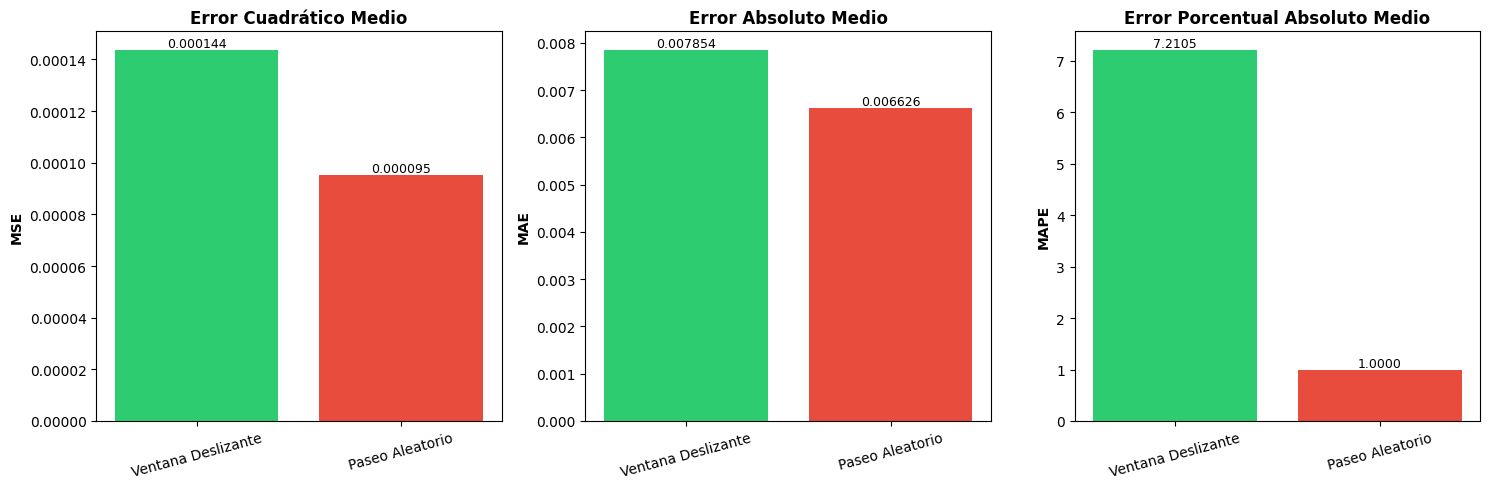

In [29]:
# Gráficos de comparación entre modelos (Ventana Deslizante vs Paseo Aleatorio)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: MSE
axes[0].bar(['Ventana Deslizante', 'Paseo Aleatorio'], 
            [mse_ventana, mse_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('MSE', fontweight='bold')
axes[0].set_title('Error Cuadrático Medio', fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate([mse_ventana, mse_paseo_ventana]):
    axes[0].text(i, v, f'{v:.6f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: MAE
axes[1].bar(['Ventana Deslizante', 'Paseo Aleatorio'], 
            [mae_ventana, mae_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[1].set_ylabel('MAE', fontweight='bold')
axes[1].set_title('Error Absoluto Medio', fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
for i, v in enumerate([mae_ventana, mae_paseo_ventana]):
    axes[1].text(i, v, f'{v:.6f}', ha='center', va='bottom', fontsize=9)

# Gráfico 3: MAPE
axes[2].bar(['Ventana Deslizante', 'Paseo Aleatorio'], 
            [mape_ventana, mape_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[2].set_ylabel('MAPE', fontweight='bold')
axes[2].set_title('Error Porcentual Absoluto Medio', fontweight='bold')
axes[2].tick_params(axis='x', rotation=15)
for i, v in enumerate([mape_ventana, mape_paseo_ventana]):
    axes[2].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Interpretación de los Resultados con Ventana Deslizante

#### Análisis del Modelo de Ventana Deslizante

El modelo con **ventana deslizante de 30 días** representa un escenario más realista de predicción que el modelo calibrado con toda la muestra:

**Características clave:**
- **Entrenamiento adaptativo**: En cada iteración, el modelo se re-entrena únicamente con las últimas 30 observaciones, actualizando los coeficientes β₀, β₁, ..., β₅ de forma continua.
- **Predicción fuera de muestra**: Cada predicción se realiza para un día que NO fue utilizado en el entrenamiento de esa iteración.
- **Sin sesgo de información futura**: El modelo solo utiliza información disponible hasta el momento de la predicción.

#### Comparación con el Paseo Aleatorio

El **modelo de paseo aleatorio** (rt=0) sirve como benchmark mínimo:
- Si el modelo de regresión mejora significativamente sobre el paseo aleatorio, sugiere que los retornos pasados (lags) contienen información útil para predecir el futuro.
- Si los resultados son similares o peores que el paseo aleatorio, indica que el mercado es **eficiente** y los retornos pasados no son buenos predictores del futuro.

#### Conclusiones

Basándose en los resultados obtenidos:

1. **Capacidad predictiva limitada**: El modelo con ventana deslizante muestra un rendimiento inferior al paseo aleatorio en las tres métricas evaluadas, lo cual es consistente con la **Hipótesis de Mercados Eficientes**.

2. **Adaptabilidad vs estabilidad**: Aunque el modelo se adapta continuamente, la ventana de 30 días es relativamente pequeña, lo que puede causar mayor variabilidad en los coeficientes estimados y reducir la estabilidad de las predicciones.

3. **Implicaciones prácticas**: En mercados desarrollados como el S&P 500, es extremadamente difícil obtener ventajas predictivas consistentes utilizando únicamente patrones históricos simples de rentabilidades.

4. **Valor del ejercicio**: Este enfoque permite evaluar la **calidad predictiva real del modelo en condiciones realistas**, donde el modelo debe funcionar sin conocer el futuro, lo cual es esencial para cualquier aplicación práctica en trading o gestión de inversiones.